In [1]:
import pandas as pd
import numpy as np
import glob
from uimfpy.UIMFReader import *
import matplotlib.pyplot as plt
import pickle
from CollectHeavyTargetPeaks import read_target_list,collect_target_mzbins#,collect_peaks
from CollectHeavyTargetPeaksTest import test_collect_peaks

from scipy import ndimage as ndi
from CollectHeavyTargetPeaks import find_mzbin_infos, xic_matrix, lc_chromatogram, drift_chromatogram
from skimage.feature import peak_local_max

# data loading

In [5]:
data_folder = '/Users/leej324/Downloads/LC_SLIM/'
target_list_file = data_folder+'20190319-Slim charge1-5 light-heavy.xlsx'
concen = 5000
uimf = data_folder+'LC_{0}_heavy_repA_1_MinInt5_DComp5.uimf'.format(concen)
xic2d_file = data_folder+'LC_{0}_heavy_repA_1_MinInt5_DComp5_50ppm.pkl'.format(concen)

def load_data(uimf_file, xic2d_file, target_list_file, ppm=20, isotope=0):
    stime = time.time()
    reader = UIMFReader(uimf_file, TIC_threshold=0)
    target_df = read_target_list(target_list_file, sheet_name=0)
    print('# ready targets:{0},'.format(target_df.shape[0]), (time.time()-stime)/60, 'min')
    target_mzbins, mzbins_by_mz = collect_target_mzbins(target_df, reader.mz_calibrator_by_params, ppm=ppm, isotope=isotope, heavy_only=True)
    print('# ready target m/z bins,', len(target_mzbins[('0.347577', '0.0549547', '1.0')]), (time.time()-stime)/60, 'min')

    try:
        with open(xic2d_file, 'rb') as handle:
            xic_by_mzbins = pickle.load(handle)
    except FileNotFoundError:
        print("[ERR] There is no target_xic2d_file: %s" % xic2d_file)
    print('# ready 2d xic_by_mzbins,', len(xic_by_mzbins), (time.time()-stime)/60, 'min')
    xic_by_mzbins = {k: xic_by_mzbins[k] for k in xic_by_mzbins.keys() & set(target_mzbins[('0.347577', '0.0549547', '1.0')])}
    print('# filtered 2d xic_by_mzbins,', len(xic_by_mzbins), (time.time()-stime)/60, 'min')
    return xic_by_mzbins, mzbins_by_mz

xic_by_mzbins, mzbins_by_mz = load_data(uimf, xic2d_file, target_list_file, ppm=50, isotope=0)

####################################################################################################
# Average TOF length: 812720.0 (0.0)
# M/Z calibrators by params: {('0.347577', '0.0549547', '1.0'): <uimfpy.MzCalibrator.MzCalibrator object at 0x1c22ec84e0>}
####################################################################################################
# ready targets:4490, 0.00674587885538737 min
('0.347577', '0.0549547', '1.0')
('0.347577', '0.0549547', '1.0') , #mzbins: 12265
# ready target m/z bins, 12265 0.012687432765960693 min
# ready 2d xic_by_mzbins, 34373 0.6630715449651082 min
# filtered 2d xic_by_mzbins, 9236 0.6684099316596985 min


In [7]:
# reader = UIMFReader(uimf, TIC_threshold=0)
reader.drift_ms(1000)

812.7199999999999

find mzbins by sequence ('TLEPVKPPTVPNDY[+80]MTSPAR[+10]', 1152.054478, 1152.054478, 0, 2)


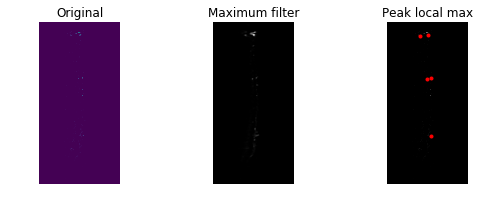

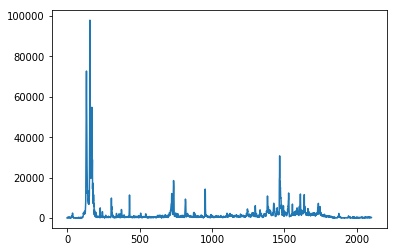

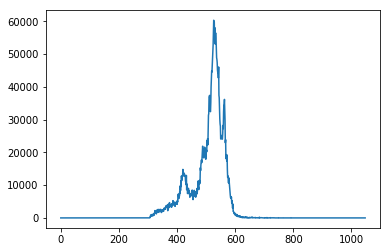

####################
Global peak: frame 167, scan 527
[71 39]
0.0
[ 53 101]
0.4299606390368141
[ 16 111]
0.7890715443389673
roi size: (29, 60)
_peak_area: 717738
_local_peak: {'frame': 170, 'scan': 528, 'frame_start': 151, 'frame_end': 180, 'scan_start': 482, 'scan_end': 542, 'peak_area': 717738}


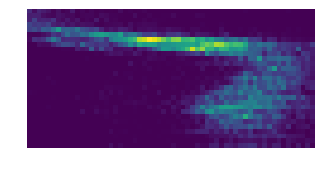

/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # This is added back by InteractiveShellApp.init_path()


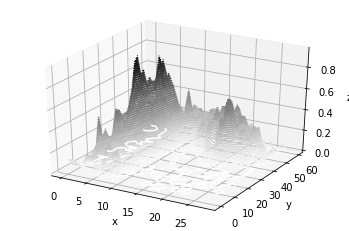

roi size: (17, 60)
_peak_area: 398052
_local_peak: {'frame': 133, 'scan': 538, 'frame_start': 128, 'frame_end': 145, 'scan_start': 492, 'scan_end': 552, 'peak_area': 398052}


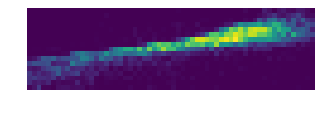

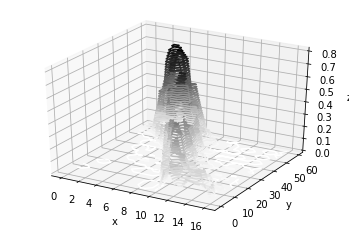

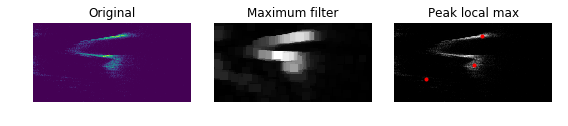

####################
Global peak: frame 171, scan 420
[ 67 146]
0.0
[ 52 100]
0.3510071775874045
[23 59]
0.015049780041676314
roi size: (12, 14)
_peak_area: 63292
_local_peak: {'frame': 173, 'scan': 420, 'frame_start': 167, 'frame_end': 179, 'scan_start': 413, 'scan_end': 427, 'peak_area': 63292}


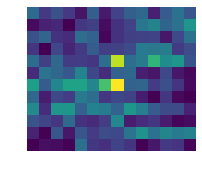

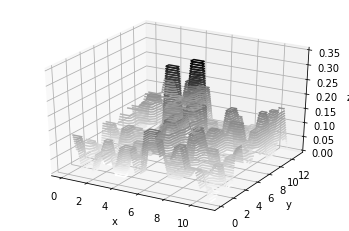

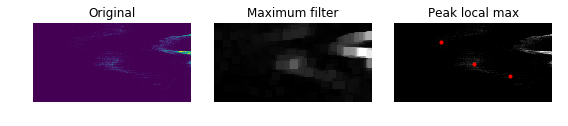

####################
Global peak: frame 724, scan 563
[61 48]
0.5042833989349387
[47 99]
0.020143551748089836
[16 48]
0.012502894188469553
roi size: (13, 14)
_peak_area: 77236
_local_peak: {'frame': 735, 'scan': 511, 'frame_start': 730, 'frame_end': 743, 'scan_start': 505, 'scan_end': 519, 'peak_area': 77236}


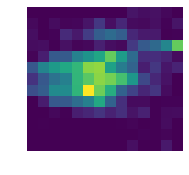

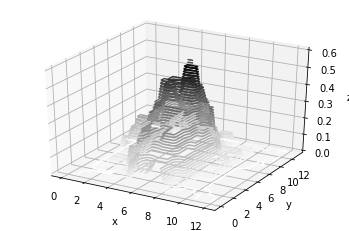

roi size: (15, 16)
_peak_area: 74441
_local_peak: {'frame': 721, 'scan': 562, 'frame_start': 715, 'frame_end': 730, 'scan_start': 554, 'scan_end': 570, 'peak_area': 74441}


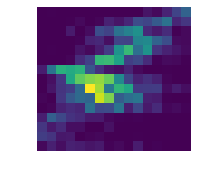

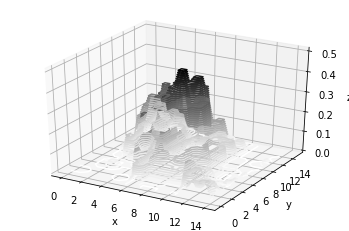

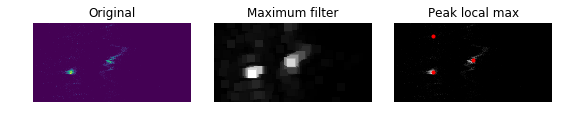

####################
Global peak: frame 741, scan 513
[44 98]
0.5042833989349387
[ 30 149]
0.020143551748089836
[23 39]
0.0
roi size: (13, 14)
_peak_area: 77236
_local_peak: {'frame': 735, 'scan': 511, 'frame_start': 730, 'frame_end': 743, 'scan_start': 505, 'scan_end': 519, 'peak_area': 77236}


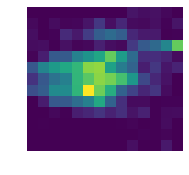

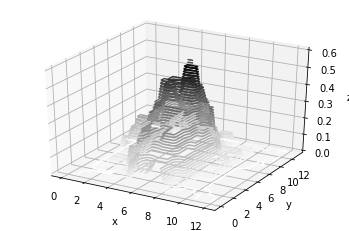

roi size: (15, 16)
_peak_area: 74441
_local_peak: {'frame': 721, 'scan': 562, 'frame_start': 715, 'frame_end': 730, 'scan_start': 554, 'scan_end': 570, 'peak_area': 74441}


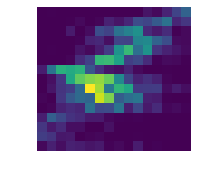

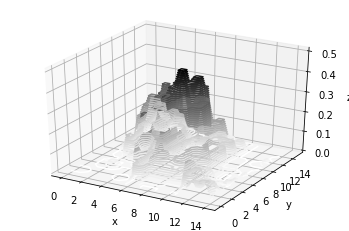

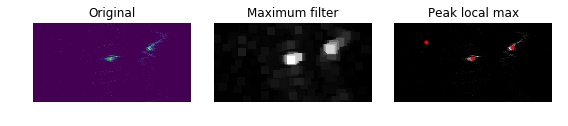

####################
Global peak: frame 1475, scan 567
[ 46 105]
0.14563556378791387
roi size: (24, 63)
_peak_area: 199270
_local_peak: {'frame': 1471, 'scan': 572, 'frame_start': 1462, 'frame_end': 1486, 'scan_start': 532, 'scan_end': 595, 'peak_area': 199270}


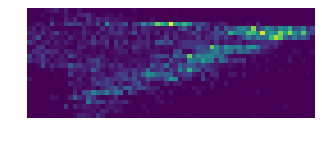

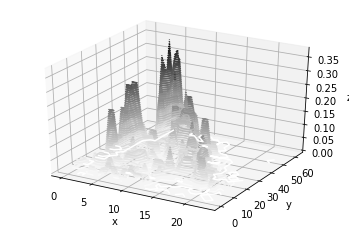

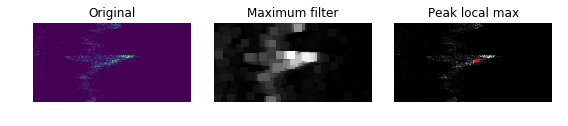

[{'frame': 170,
  'frame_end': 180,
  'frame_start': 151,
  'peak_area': 717738,
  'scan': 528,
  'scan_end': 542,
  'scan_start': 482},
 {'frame': 133,
  'frame_end': 145,
  'frame_start': 128,
  'peak_area': 398052,
  'scan': 538,
  'scan_end': 552,
  'scan_start': 492},
 {'frame': 1471,
  'frame_end': 1486,
  'frame_start': 1462,
  'peak_area': 199270,
  'scan': 572,
  'scan_end': 595,
  'scan_start': 532},
 {'frame': 735,
  'frame_end': 743,
  'frame_start': 730,
  'peak_area': 77236,
  'scan': 511,
  'scan_end': 519,
  'scan_start': 505},
 {'frame': 721,
  'frame_end': 730,
  'frame_start': 715,
  'peak_area': 74441,
  'scan': 562,
  'scan_end': 570,
  'scan_start': 554},
 {'frame': 173,
  'frame_end': 179,
  'frame_start': 167,
  'peak_area': 63292,
  'scan': 420,
  'scan_end': 427,
  'scan_start': 413}]

In [18]:
def get_local_peaks(xic_2d, coordinates, frame_pad=50, scan_pad=100, npeaks_per_candidate=3, local_min_distance=20,
                    masking_threshold=0.1, frames_for_peak=None, scans_for_peak=None,
                    th_peak_area=0, fout=None, debug=False):
    xic_2d_max = xic_2d.max()
    im_gray = xic_2d/xic_2d_max
    max_frames,max_scans = xic_2d.shape

    local_peaks = []
    
    def get_3d_xic(xic_2d, x, y):
        return xic_2d[[x.astype(int),y.astype(int)]]

    for i,j in coordinates:
        if debug:
            print("#"*20)
            print('Global peak: frame {}, scan {}'.format(i, j))
        # extract a local 2d xic
        _min_frame = max(0,i-frame_pad)
        _max_frame = min(i+frame_pad,max_frames)
        _min_scan = max(0,j-scan_pad)
        _max_scan = min(j+scan_pad,max_scans)
        
        #print('Frames: %d:%d, Scans:%d:%d' %(_min_frame,_max_frame,_min_scan,_max_scan))
        image = im_gray[_min_frame:_max_frame,_min_scan:_max_scan]
        
        # filter by moving average
        moving_avg_image = ndi.uniform_filter(image, size=10, mode='constant')
        local_max = moving_avg_image.max()
        
        # filter by maximum (only for visualization)
        image_max = ndi.maximum_filter(image, size=10, mode='constant')
        # find peak candidates in moving_avg_image
        candidates = peak_local_max(moving_avg_image, min_distance=local_min_distance, num_peaks=npeaks_per_candidate)
        if debug:
            for k in range(candidates.shape[0]):
                print(candidates[k])
                print(image[candidates[k, 0], candidates[k, 1]])
        
        if (frames_for_peak is None) or (scans_for_peak is None):
            ##########################################################
            # find a rectangle bounding box for each peak candidate
            ##########################################################
            # make a binary masking with a threshold
            mask = moving_avg_image > (local_max*masking_threshold)
            # label the regions
            label_im, nb_labels = ndi.label(mask)
            sizes = ndi.sum(mask, label_im, range(nb_labels + 1))
            peak_area = ndi.sum(image, label_im, range(nb_labels + 1))

            target_labels = []
            for k in range(candidates.shape[0]):
                # label of a candidate
                target_label = label_im[candidates[k,0], candidates[k,1]]
                # if a peak area is too small
                # _peak_area = peak_area[target_label]*xic_2d_max
                # if _peak_area < th_peak_area: continue
                # if a region is meaningful
                if (sizes[target_label] > 0) & (target_label not in target_labels):
                    target_labels.append(target_label)
                    slice_x, slice_y = ndi.find_objects(label_im==target_label)[0]
                    #print('boundary:', slice_x, slice_y)
                    # print(candidates[k], target_label, sizes[target_label], _peak_area)

                    # save peaks
                    _local_peak = {'frame':candidates[k,0]+_min_frame, 'scan':candidates[k,1]+_min_scan,
                     'frame_start':slice_x.start+_min_frame, 'frame_end':slice_x.stop+_min_frame,
                     'scan_start':slice_y.start+_min_scan, 'scan_end':slice_y.stop+_min_scan,
                     # 'peak_area':_peak_area
                    }
                    _peak_area = np.sum(xic_2d[_local_peak['frame_start']:_local_peak['frame_end'],_local_peak['scan_start']:_local_peak['scan_end']])
                    if _peak_area < th_peak_area: continue
                    _local_peak['peak_area'] = _peak_area
                    
                    local_peaks.append(_local_peak)
                    if debug:
                        ##########################################################
                        # plot
                        ##########################################################
                        roi = image[slice_x, slice_y]
                        
                        print("roi size:", roi.shape)
                        print('_peak_area:', _peak_area)
                        print("_local_peak:", _local_peak)

                        plt.figure(figsize=(4, 2))
                        plt.axes([0, 0, 1, 1])
                        plt.imshow(roi)
                        plt.axis('off')

                        plt.show()
                        
                        x = np.linspace(0, slice_x.stop-slice_x.start-1, 30)
                        y = np.linspace(0, slice_y.stop-slice_y.start-1, 30)

                        X, Y = np.meshgrid(x, y)
                        Z = get_3d_xic(roi, X, Y)
                        fig = plt.figure()
                        ax = plt.axes(projection='3d')
                        ax.contour3D(X, Y, Z, 50, cmap='binary')
                        ax.set_xlabel('x')
                        ax.set_ylabel('y')
                        ax.set_zlabel('z')
                        plt.show()
            ##########################################################
            # find a rectangle bounding box for each peak candidate
            ##########################################################
        else:
            _local = peaks_with_static_box(image, xic_2d_max, candidates, _min_frame, _min_scan,
                frames_for_peak, scans_for_peak,
                th_peak_area)
            local_peaks += _local
        if debug:
            # display results
            fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
            ax = axes.ravel()
            ax[0].imshow(image)
            ax[0].axis('off')
            ax[0].set_title('Original')

            ax[1].imshow(image_max, cmap=plt.cm.gray)
            ax[1].axis('off')
            ax[1].set_title('Maximum filter')

            ax[2].imshow(image, cmap=plt.cm.gray)
            ax[2].autoscale(False)
            ax[2].plot(candidates[:, 1], candidates[:, 0], 'r.')
            ax[2].axis('off')
            ax[2].set_title('Peak local max')

            plt.tight_layout()
            # plt.savefig('peak_local_max_{0:.2f}.png'.format(mz))
            plt.show()
    return local_peaks

def collect_peaks(xic_by_mzbin, mzbins, num_frames, num_scans, 
                  global_min_distance=20, local_min_distance=20, num_top_peaks=20, 
                  num_global_peaks=20, frames_for_peak=None, scans_for_peak=None,
                  masking_threshold=0.01, th_peak_area=0, moving_avg_size=20, debug=False):
    im = xic_matrix(xic_by_mzbin, mzbins, num_frames, num_scans, normalize=False)
    if im.max()==0:
        print('im.max()==0:', mzbins)
        return []
    im_gray = im/im.max()

    moving_avg_image = ndi.uniform_filter(im_gray, size=moving_avg_size, mode='constant')

    # Comparison between image_max and im to find the coordinates of local maxima
    coordinates = peak_local_max(moving_avg_image, min_distance=global_min_distance, num_peaks=num_global_peaks)
    
    if debug:
        # display results
        fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)
        ax = axes.ravel()
        ax[0].imshow(im_gray)

        ax[0].axis('off')
        ax[0].set_title('Original')

        ax[1].imshow(moving_avg_image, cmap=plt.cm.gray)
        ax[1].axis('off')
        ax[1].set_title('Maximum filter')

        ax[2].imshow(im_gray, cmap=plt.cm.gray)
        ax[2].autoscale(False)
        ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
        ax[2].axis('off')
        ax[2].set_title('Peak local max')

        plt.tight_layout()

        plt.show()

        lc_chromatogram(xic_by_mzbin, mzbins, num_frames, num_scans)
        drift_chromatogram(xic_by_mzbin, mzbins, num_frames, num_scans)
    
    local_peaks = get_local_peaks(im, coordinates, frame_pad=50, scan_pad=100, npeaks_per_candidate=3, local_min_distance=local_min_distance, 
                                  frames_for_peak=frames_for_peak, scans_for_peak=scans_for_peak, masking_threshold=masking_threshold,
                                  th_peak_area=th_peak_area, debug=debug)
    if len(local_peaks) == 0: return []

    local_peaks_df = pd.DataFrame(local_peaks).drop_duplicates()
    local_peaks_df = local_peaks_df.astype(np.uint32)
    return local_peaks_df.sort_values('peak_area', ascending=False).head(num_top_peaks).to_dict(orient='record')

def test_collect_peaks(xic_by_mzbins, mzbins_by_mz, pepseq, z, num_frames, num_scans,
                       global_min_distance, local_min_distance,
                       num_top_peaks, num_global_peaks, frames_for_peak, scans_for_peak,
                       masking_threshold, th_peak_area, moving_avg_size, debug=True):
    mono_info = find_mzbin_infos(mzbins_by_mz, pepseq, 0, z)
    if debug: print("find mzbins by sequence", mono_info)
    target_mzbin = mzbins_by_mz[mono_info]
    local_peaks = collect_peaks(xic_by_mzbins, target_mzbin, num_frames, num_scans,
                                global_min_distance=global_min_distance, local_min_distance=local_min_distance,
                                num_top_peaks=num_top_peaks, num_global_peaks=num_global_peaks,
                                frames_for_peak=frames_for_peak, scans_for_peak=scans_for_peak,
                                masking_threshold=masking_threshold, th_peak_area=th_peak_area,
                                moving_avg_size=moving_avg_size, debug=debug)
    return local_peaks

# pepseq = 'IQAAAST[+80]PTNATAASDANTGDR[+10]'
pepseq = 'TLEPVKPPTVPNDY[+80]MTSPAR[+10]'
z = 2
# reader = UIMFReader(uimf, TIC_threshold=0)

test_collect_peaks(xic_by_mzbins, mzbins_by_mz, pepseq, z, reader.num_frames, reader.num_scans,
                   global_min_distance=20, local_min_distance=15,
                   num_top_peaks=20, num_global_peaks=5, frames_for_peak=None, scans_for_peak=None,
                   masking_threshold=0.3, th_peak_area=1000, moving_avg_size=20, debug=True)